# Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
date_filename = "2018-04-01_2018-04-30"

In [3]:
data = pd.read_csv("articles_" + date_filename + ".csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
eb8e9bb4465037557f2b72a02463ef2240048a0a,https://www.thetimes.co.uk/article/mccann-pres...,McCann presence helps Dundee secure valuable p...,2018-04-01 17:09:07.450,2018-04-01,0,0.000000,2018-04-01T17:20:06.737Z,0,0,0,The Times,thetimes_co_uk,0,350,392.0,False,NaN,NaN,6435,125.0
58f51d1d8e99d7c9909b84201706b10411632331,https://www.thetimes.co.uk/article/anthony-jos...,Anthony Joshua showed he has the maturity to r...,2018-04-01 17:09:08.170,2018-04-01,0,0.000000,2018-04-01T17:20:06.739Z,0,0,0,The Times,thetimes_co_uk,0,350,392.0,False,NaN,NaN,6435,125.0
0b1a1a27c7e6f3aff21586ae2d447b4f1944e597,https://www.thetimes.co.uk/article/saracens-eu...,Saracens’ European reign ended by familiar foes,2018-04-01 17:09:08.413,2018-04-01,0,0.000000,2018-04-01T17:20:06.740Z,0,0,0,The Times,thetimes_co_uk,0,350,392.0,False,NaN,NaN,6435,125.0
3f9169b7e2d845613721fe006eba63b9bd8f6ffb,https://www.thetimes.co.uk/article/labour-part...,Labour Party donor Sir David Garrard quits par...,2018-04-01 11:09:13.260,2018-04-01,1,0.016429,2018-04-01T12:21:04.387Z,0,0,1,The Times,thetimes_co_uk,0,709,381.0,False,NaN,NaN,6435,126.0
2a743b32a30e803f38b966ef27e1cbf9f5ccd7ba,https://www.thetimes.co.uk/article/jordan-pete...,Jordan Peterson: the bestselling author and cl...,2018-04-01 20:33:13.945,2018-04-01,293,1.820941,2018-04-01T20:45:07.257Z,86,144,63,The Times,thetimes_co_uk,0,0,NaN,True,763761.0,2018-04-01T20:30:02.000Z,6435,125.0


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [4]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    138275.00
mean       1301.27
std       10881.11
min           0.00
50%          25.00
75%         236.00
90%        1467.00
95%        4082.00
99%       24069.16
99.5%     42726.87
99.9%    127818.48
max     1282889.00
Name: fb_engagements, dtype: float64

There's 2 articles with more than 1 million engagements this month.

In [5]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
a2c14a5be2fd2120a995789a59f63751734d8312,http://www.foxnews.com/entertainment/2018/04/1...,'Full Metal Jacket' actor R. Lee Ermey dies at...,2018-04-15 23:23:18.706,2018-04-15 23:20:18,1088522,3701.16,2018-04-15T23:55:11.721Z,111839,781170,195513,Fox News,foxnews_com,0,2204,154.00,True,16331201.00,2018-04-15T23:21:55.000Z,285,359.00
1c67b7d5633798a8217ff854d6e4854d64ac1b78,https://www.npr.org/sections/ed/2018/04/25/605...,"High-Paying Trade Jobs Sit Empty, While High S...",2018-04-25 21:01:27.348,2018-04-25 20:00:00,1282889,833.15,2018-04-26T16:49:11.642Z,216494,829474,236921,NPR,npr_org,0,965,30.00,True,6298047.00,2018-04-26T04:22:00.000Z,594,1673.00


In [6]:
data.fb_engagements.mode()

0    0
dtype: int64

*november* Going back to the enagement counts, we see the mean is 1,117, mode is zero, median is 24, 90th percentile is 1,453, 99th percentile is 21,166, 99.5th percentile is 33,982. The standard deviation is 8,083, significantly higher than the mean, so this is not a normal distribution. 

*december* Going back to the enagement counts, we see the mean is 1,106, mode is zero, median is 24, 90th percentile is 1,545, 99th percentile is 20,228, 99.5th percentile is 32,446. The standard deviation is 9,852, significantly higher than the mean, so this is not a normal distribution. 

*january 2018* Going back to the enagement counts, we see the mean is 1,108, mode is zero, median is 26, 90th percentile is 1,621, 99th percentile is 19,918, 99.5th percentile is 32,935. The standard deviation is 8,278, significantly higher than the mean, so this is not a normal distribution. 

*february 2018* Going back to the enagement counts, we see the mean is 1,237, mode is zero, median is 25, 90th percentile is 1,453, 99th percentile is 23,172, 99.5th percentile is 38,692. The standard deviation is 11,019, significantly higher than the mean, so this is not a normal distribution. 

*march 2018* Going back to the enagement counts, we see the mean is 1,519, mode is zero, median is 25, 90th percentile is 1,597, 99th percentile is 27,468, 99.5th percentile is 51,204. The standard deviation is 15,132, significantly higher than the mean, so this is not a normal distribution. 

*april 2018* Going back to the enagement counts, we see the mean is 1,301, mode is zero, median is 25, 90th percentile is 1,467, 99th percentile is 24,069, 99.5th percentile is 42,726. The standard deviation is 10,881, significantly higher than the mean, so this is not a normal distribution. 

Key publishers stats

In [7]:
data.groupby("publisher_id").agg({'url': 'count', 'fb_engagements': ['sum', 'median', 'mean']})

url fb_engagements                
                                  count            sum  median    mean
publisher_id                                                          
anotherangryvoice_blogspot_co_uk     37         182291 2207.00 4926.78
bbc_co_uk                         12059       10830500   26.00  898.13
breitbart_com                      2589        7211253  145.00 2785.34
brexitcentral_com                    42          39391  398.50  937.88
buzzfeed_com                       1290        2463775  191.50 1909.90
cnn_com                            3996       24266804  516.50 6072.77
dailymail_co_uk                   24494       17875059   18.00  729.77
economist_com                       504         245341   32.50  486.79
evolvepolitics_com                   65         255755 1553.00 3934.69
foxnews_com                        5009       22811621  103.00 4554.13
ft_com                             4416         270005    4.00   61.14
huffingtonpost_com                 2250       10943965  785.00 4863.98
independent_co_uk                  5290        3943093   35.50  745.39
indy100_com                         395         257944  111.00  653.02
lemonde_fr                         3649        2023160   71.00  554.44
libdemvoice_org                     141           2837   13.00   20.12
mirror_co_uk                       9204        5571882   32.00  605.38
nbcnews_com                        1878        7042840  420.50 3750.18
newstatesman_com                    439          97708   19.00  222.57
npr_org                            1824       10768007  346.00 5903.51
nytimes_com                        4627       18669054  209.00 4034.81
order-order_com                     257          81152  150.00  315.77
propublica_org                       51          52191  346.00 1023.35
reuters_com                        6179        3171709   17.00  513.30
rt_com                             2302        3609677  376.50 1568.06
skwawkbox_org                       121         115099  545.00  951.23
telegraph_co_uk                    6009        1703445   16.00  283.48
thecanary_co                        276         345275  645.00 1251.00
theguardian_com                    7989        8911855  122.00 1115.52
thetimes_co_uk                     8887         295032    1.00   33.20
washingtonpost_com                21307       13599144    0.00  638.25
westmonster_com                     302         497503   42.50 1647.36
yournewswire_com                    397        1778898   45.00 4480.85

In [8]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

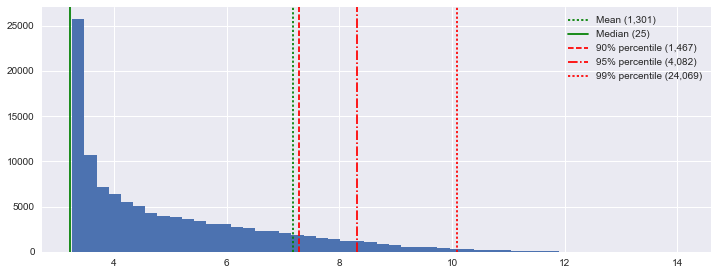

In [9]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


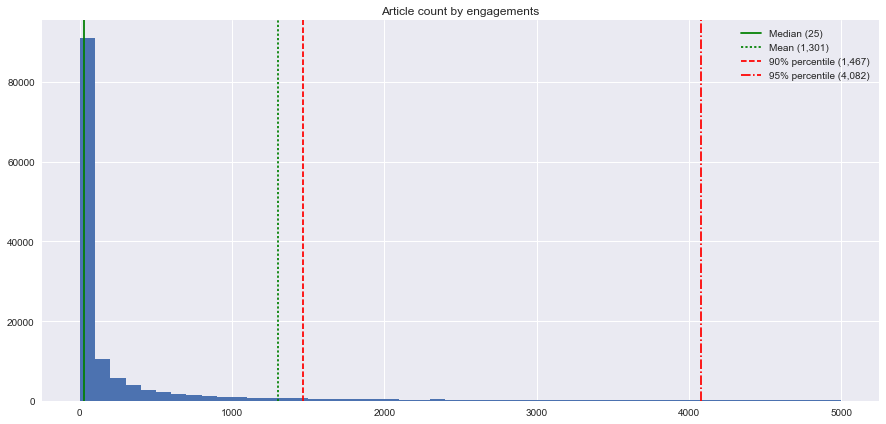

In [10]:
eng = data.fb_engagements[(data.fb_engagements < 5000)]
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(15,7))
plt.hist(eng, bins=50)
plt.title("Article count by engagements")
plt.axvline(median, label=f'Median ({median:,.0f})', color='green')
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(ninety, linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(ninetyfive, linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
# plt.axvline(ninetynine, linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


In [11]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   113072.00
mean         4.98
std          1.76
min          3.26
25%          3.53
50%          4.38
75%          5.99
max         11.76
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [12]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   113072.00
mean        10.62
std         10.38
min          0.00
25%          2.00
50%          7.00
75%         17.00
max         50.00
Name: fb_engagements, dtype: float64

In [13]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

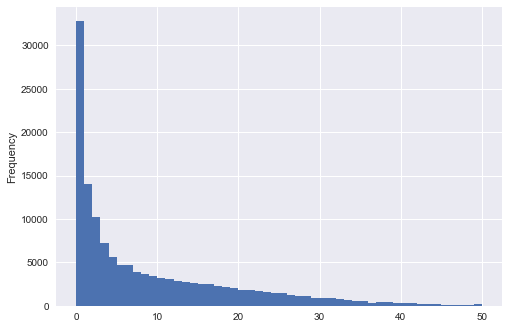

In [14]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Looks good to me, lets save that.

In [15]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [16]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   138275.00
mean         9.26
std         90.28
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        284.00
99.5%      580.00
99.9%     1199.73
max       9840.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [17]:
lead_articles = data[data.mins_as_lead > 0]

In [18]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   3928.00
mean     326.03
std      428.55
min        4.00
25%       84.00
50%      184.00
75%      424.00
90%      804.30
95%     1074.00
99%     1599.73
99.5%   1832.37
99.9%   4428.57
max     9840.00
Name: mins_as_lead, dtype: float64

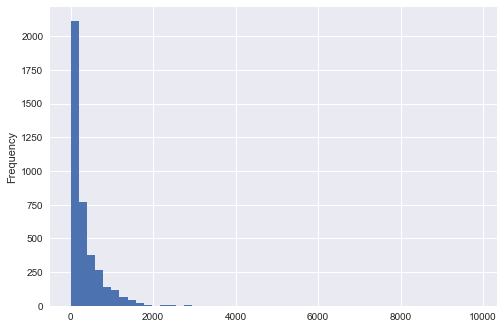

In [19]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

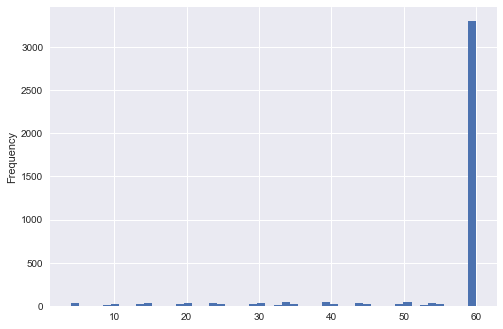

In [20]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [21]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
lemonde_fr                             618
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     1276

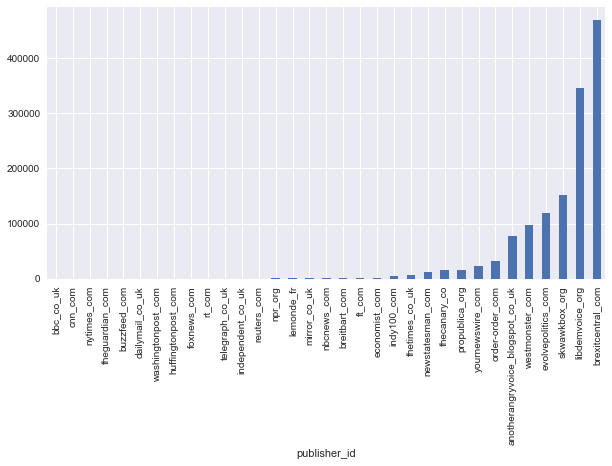

In [22]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

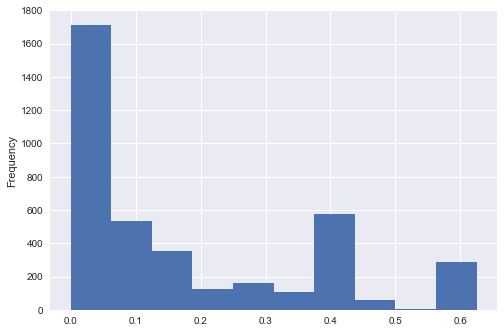

In [23]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

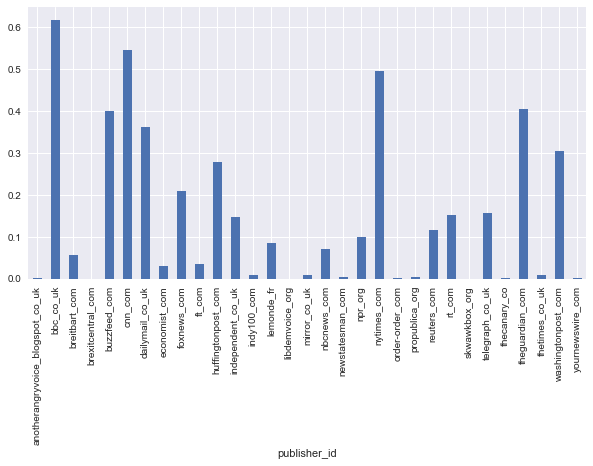

In [24]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

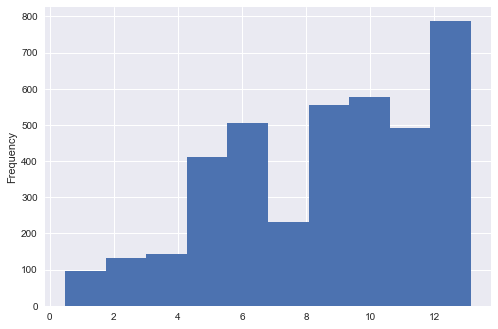

In [25]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [26]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,37.00,5.33,0.00,5.33,5.33,5.33,5.33,5.33
bbc_co_uk,105.00,12.97,1.31,2.19,13.15,13.15,13.15,13.15
breitbart_com,205.00,8.18,1.63,0.72,8.69,8.69,8.69,8.69
brexitcentral_com,35.00,4.49,0.65,0.77,4.59,4.59,4.59,4.59
buzzfeed_com,321.00,11.74,1.24,1.00,12.02,12.02,12.02,12.02
cnn_com,210.00,12.29,2.00,2.15,12.89,12.89,12.89,12.89
dailymail_co_uk,154.00,11.31,1.89,0.99,11.85,11.85,11.85,11.85
economist_com,48.00,7.65,1.23,1.33,7.99,7.99,7.99,7.99
foxnews_com,114.00,10.50,0.62,6.90,10.61,10.61,10.61,10.61


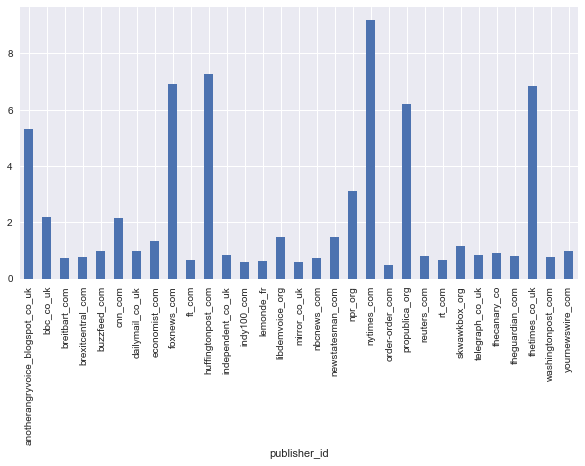

In [27]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [28]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [29]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.4812571144098754, 13.145359968846892)

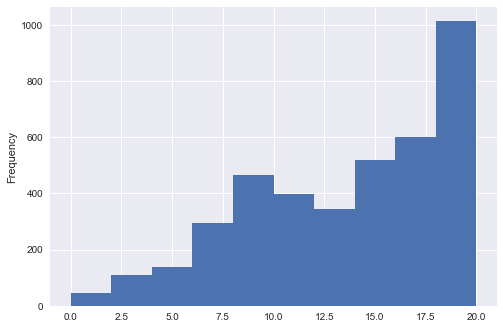

In [30]:
lead_proposal_3.plot.hist()

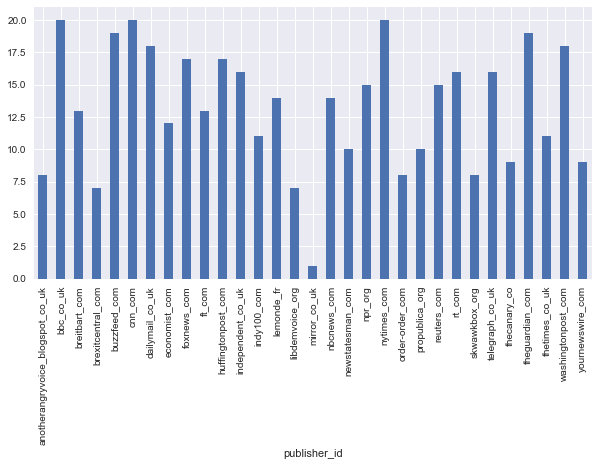

In [31]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [32]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [33]:
data.lead_score.value_counts().sort_index()

0.00     134348
1.00         46
2.00         50
3.00         60
4.00         73
5.00         64
6.00         78
7.00        216
8.00        194
9.00        272
10.00       234
11.00       164
12.00        67
13.00       278
14.00       276
15.00       241
16.00       336
17.00       265
18.00       226
19.00       437
20.00       350
Name: lead_score, dtype: int64

In [34]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      13.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  0.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
lemonde_fr                         14.00
libdemvoice_org                     7.00
mirror_co_uk                        2.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [35]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [36]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

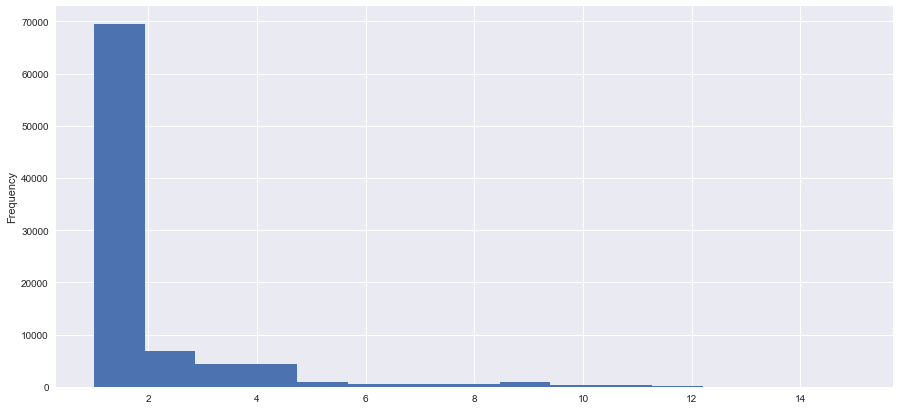

In [37]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [38]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     69443
2.00      6888
3.00      4403
4.00      4357
5.00       843
6.00       606
7.00       537
8.00       443
9.00       876
10.00      323
11.00      372
12.00      145
13.00       39
14.00       27
15.00        9
dtype: int64

In [39]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk      37.00
bbc_co_uk                          13580.00
breitbart_com                       2494.00
brexitcentral_com                     42.00
buzzfeed_com                        8720.00
cnn_com                            12377.00
dailymail_co_uk                    14392.00
economist_com                        244.00
evolvepolitics_com                    61.00
foxnews_com                         6264.00
ft_com                              2983.00
huffingtonpost_com                  7806.00
independent_co_uk                   3799.00
indy100_com                          392.00
lemonde_fr                          3645.00
libdemvoice_org                      140.00
mirror_co_uk                        8722.00
nbcnews_com                         1659.00
newstatesman_com                     432.00
npr_org                             2754.00
nytimes_com                         9206.00
order-order_com                      257.00
propublica_org     

That looks good to me.

In [40]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [41]:
data.front_score 

id
eb8e9bb4465037557f2b72a02463ef2240048a0a   1.00
58f51d1d8e99d7c9909b84201706b10411632331   1.00
0b1a1a27c7e6f3aff21586ae2d447b4f1944e597   1.00
3f9169b7e2d845613721fe006eba63b9bd8f6ffb   1.00
2a743b32a30e803f38b966ef27e1cbf9f5ccd7ba   0.00
1ebabeaa2db7cc62305cae75986d6d108165c7f2   1.00
772fc50f1134a566dc5e001423994070b8c58a93   1.00
4a7806d2ce55afcb6faf9b968afddf9081e6fc3b   1.00
14f2c2f6943742da6e4b3bd6e55c540f84d14f89   1.00
731c40614f7299ff148188cb4935ac42f78504e2   1.00
9630301c907b8df80e414e6cf4b91db234fd49e8   1.00
164ebf483c3d37fce9663e48bc38a6d8f193c948   1.00
0aa736272acb499eb78d5ef0f82e95c4e1306e66   1.00
408e7e5138bfe286f3a3ace50e288b73ec7d70e8   1.00
f975e668a58e5dd418b2d27115bf355b0e2c8f26   1.00
d624b8ac09af1d50be8fbc87b7a3ef344cdf94fb   1.00
8092f3fbd0b033689e9d2d6c435d9b7018d54ed5   1.00
e5bb231bb892da4e3b4d949897fcbc97d2265a93   1.00
af3f789eacbc6f448f7c3d4406e6ee44b7b0b2b4   1.00
d75b82fea9ec27dc8b4b7dbb822c213270b6e22f   1.00
e8898b366e9e8cead7377d91ea84142845b8c

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [42]:
data.fb_brand_page_likes.max()

46496164.0

In [43]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

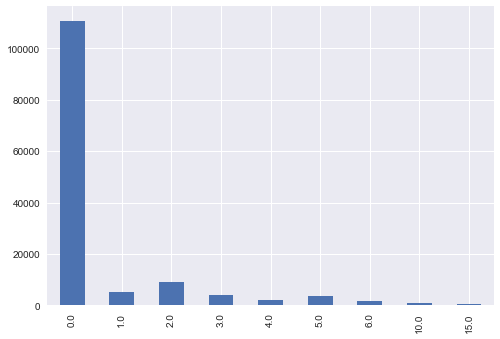

In [44]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [45]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,37.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
bbc_co_uk,12059.00,0.47,2.62,0.00,0.00,0.00,0.00,15.00
breitbart_com,2589.00,0.79,0.98,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,42.00,0.95,0.22,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,1290.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00
cnn_com,3996.00,2.61,4.39,0.00,0.00,0.00,10.00,10.00
dailymail_co_uk,24494.00,0.63,1.66,0.00,0.00,0.00,0.00,5.00
economist_com,504.00,2.24,1.30,0.00,0.00,3.00,3.00,3.00
evolvepolitics_com,65.00,0.94,0.24,0.00,1.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [46]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     334841.00
bbc_co_uk                          46496164.00
breitbart_com                       3866566.00
brexitcentral_com                     16895.00
buzzfeed_com                        2941222.00
cnn_com                            30207108.00
dailymail_co_uk                    14628916.00
economist_com                       8541804.00
evolvepolitics_com                   128802.00
foxnews_com                        16366386.00
ft_com                              3777860.00
huffingtonpost_com                  9872554.00
independent_co_uk                   8182856.00
indy100_com                          243768.00
lemonde_fr                          4140995.00
libdemvoice_org                        8631.00
mirror_co_uk                        2993874.00
nbcnews_com                         9705196.00
newstatesman_com                     154289.00
npr_org                             6312422.00
nytimes_com                        15597020.00


In [47]:
np.log(2149)

7.6727578966425103

In [48]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.72
bbc_co_uk                          17.65
breitbart_com                      15.17
brexitcentral_com                   9.73
buzzfeed_com                       14.89
cnn_com                            17.22
dailymail_co_uk                    16.50
economist_com                      15.96
evolvepolitics_com                 11.77
foxnews_com                        16.61
ft_com                             15.14
huffingtonpost_com                 16.11
independent_co_uk                  15.92
indy100_com                        12.40
lemonde_fr                         15.24
libdemvoice_org                     9.06
mirror_co_uk                       14.91
nbcnews_com                        16.09
newstatesman_com                   11.95
npr_org                            15.66
nytimes_com                        16.56
order-order_com                    10.73
propublica_org                     12.85
reuters_com                        15.20
rt_

That's more like it, but the lower numbers should be smaller.

In [49]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.81
bbc_co_uk                          10.75
breitbart_com                       8.26
brexitcentral_com                   2.83
buzzfeed_com                        7.99
cnn_com                            10.32
dailymail_co_uk                     9.59
economist_com                       9.05
evolvepolitics_com                  4.86
foxnews_com                         9.70
ft_com                              8.24
huffingtonpost_com                  9.20
independent_co_uk                   9.01
indy100_com                         5.50
lemonde_fr                          8.33
libdemvoice_org                     2.16
mirror_co_uk                        8.00
nbcnews_com                         9.18
newstatesman_com                    5.04
npr_org                             8.75
nytimes_com                         9.65
order-order_com                     3.82
propublica_org                      5.94
reuters_com                         8.30
rt_

In [50]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [51]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
lemonde_fr                         12.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [52]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [53]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      11.00
brexitcentral_com                   3.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             11.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
lemonde_fr                         12.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    6.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     4.00
propublica_org                      8.00
reuters_com                        12.00
rt_

In [54]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [55]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

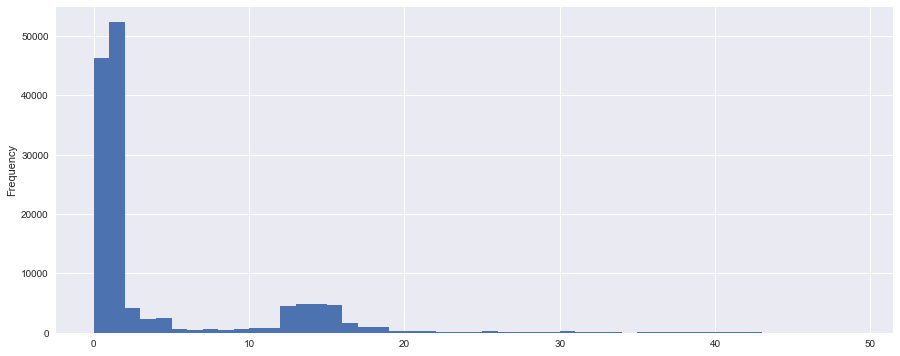

In [56]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

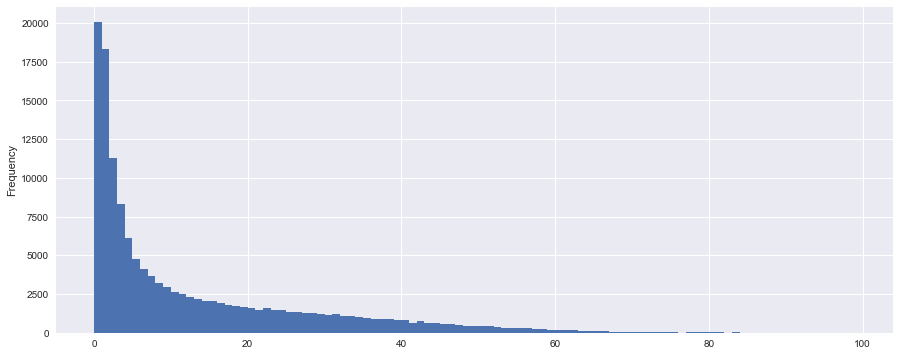

In [57]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [58]:
data.attention_index.value_counts().sort_index()

0.00     20053
1.00     18335
2.00     11291
3.00      8327
4.00      6147
5.00      4740
6.00      4091
7.00      3663
8.00      3196
9.00      2938
10.00     2605
11.00     2492
12.00     2324
13.00     2214
14.00     2021
15.00     2035
16.00     1897
17.00     1768
18.00     1725
19.00     1655
20.00     1595
21.00     1494
22.00     1574
23.00     1476
24.00     1451
25.00     1352
26.00     1344
27.00     1254
28.00     1272
29.00     1218
         ...  
66.00      100
67.00       56
68.00       70
69.00       60
70.00       52
71.00       49
72.00       56
73.00       36
74.00       41
75.00       32
76.00       19
77.00       34
78.00       29
79.00       30
80.00       20
81.00       28
82.00       17
83.00       21
84.00       19
85.00        9
86.00       10
87.00       10
88.00       10
89.00        7
90.00        4
91.00        5
92.00        3
93.00        3
94.00        3
97.00        1
Name: attention_index, Length: 96, dtype: int64

In [59]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
8fc308aeac5b6b75c0baae4d5becdaa91a489988,http://www.bbc.co.uk/news/world-europe-43841194,Swedish DJ Avicii dies at 28,2018-04-20 17:43:12.450,2018-04-20 17:42:04,355685,2261.13,2018-04-20T18:05:11.938Z,48245,233667,73773,...,46410824.00,2018-04-20T18:42:14.000Z,96,119.00,50.00,20.00,12.00,15.00,47.00,97.00
2a08dfaff24d92a3788b4ddb85bcbecec66c975f,https://www.cnn.com/2018/04/21/entertainment/v...,"Verne Troyer, 'Mini-Me' in Austin Powers films...",2018-04-21 20:58:12.888,2018-04-21 20:52:09,134799,595.71,2018-04-21T21:20:07.393Z,12457,91067,31275,...,30053099.00,2018-04-21T21:10:35.000Z,105,151.00,50.00,20.00,9.00,15.00,44.00,94.00
f42e1b7e147355839db1cca071667c4dfcde1fbc,http://www.bbc.co.uk/news/uk-43933056,Legal battle toddler Alfie Evans dies,2018-04-28 06:04:26.131,2018-04-28 06:02:47,140579,3930.28,2018-04-28T09:06:06.565Z,21382,106308,12889,...,46476225.00,2018-04-28T06:37:18.000Z,96,66.00,50.00,20.00,9.00,15.00,44.00,94.00
4bfcac581b66efe4cd843c30d0fa748fff2c47c6,https://www.cnn.com/2018/04/22/us/waffle-house...,Hero prevented further bloodshed at Tennessee ...,2018-04-22 14:10:19.077,2018-04-22 14:05:18,178909,138.33,2018-04-22T22:50:11.682Z,21312,137121,20476,...,30054437.00,2018-04-22T16:30:09.000Z,105,195.00,50.00,20.00,9.00,15.00,44.00,94.00
8145abc78ad81e5f5cc7f88a8b41c26b85becc37,https://www.cnn.com/2018/04/17/politics/barbar...,"Barbara Bush, former first lady, dies at 92",2018-04-17 23:49:24.539,2018-04-17 23:45:19,348473,1649.76,2018-04-18T01:05:10.294Z,37209,277520,33744,...,30040473.00,2018-04-17T23:49:02.000Z,105,26.00,50.00,20.00,8.00,15.00,43.00,93.00
7b9b3d5c8ee0581d1fda95ad1f2cbe7c3e4fda2b,http://www.bbc.co.uk/news/world-middle-east-43...,US allies launch strikes on Syria chemical sites,2018-04-14 01:10:11.543,2018-04-14 01:08:58,168448,466.39,2018-04-14T07:43:14.177Z,49569,94543,24336,...,46369696.00,2018-04-14T07:29:14.000Z,96,67.00,50.00,20.00,8.00,15.00,43.00,93.00
0847758466cc97ab4bdb7cebc75668dd3fcbae44,https://www.cnn.com/2018/04/16/politics/michae...,Michael Cohen reveals client list ahead of hea...,2018-04-16 15:25:20.997,2018-04-16 15:22:19,128047,5411.53,2018-04-16T21:04:20.495Z,36278,78404,13365,...,30034998.00,2018-04-16T19:16:02.000Z,105,592.00,50.00,20.00,8.00,15.00,43.00,93.00
7664a38d1979ec11da8cee1213834830cabec0c2,https://www.cnn.com/2018/04/23/politics/george...,Former President George H.W. Bush in intensive...,2018-04-23 22:49:18.709,2018-04-23 22:45:50,488393,1739.91,2018-04-23T23:11:09.019Z,98937,343905,45551,...,30060241.00,2018-04-23T22:51:47.000Z,105,20.00,50.00,20.00,7.00,15.00,42.00,92.00
5e638ea0ab5dfab129588fc29658028ca6e4c086,https://www.cnn.com/2018/04/02/politics/trump-...,Trump says 'our country is being stolen' due t...,2018-04-02 11:55:17.513,2018-04-02 11:48:33,119509,145.19,2018-04-02T12:49:14.831Z,31414,73469,14626,...,29924986.00,2018-04-02T12:35:09.000Z,105,252.00,50.00,20.00,7.00,15.00,42.00,92.00


In [60]:
data["score_diff"] = data.promotion_score - data.response_score

In [61]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
8b67316e22d9bbbbe26a97a39dd1365ff9d175d3,https://www.buzzfeed.com/katienotopoulos/teens...,Teens Also Sometimes Quit Social Media,2018-04-07 17:04:24.234,2018-04-04 17:37:46,0,0.00,2018-04-07T17:16:12.351Z,0,0,0,...,2018-04-08T01:04:02.000Z,147,1176.00,0.00,19.00,13.00,11.00,43.00,43.00,43.00
3cb27a4e5d7b0b0d6972afec2737c2a99cc76be2,https://www.buzzfeed.com/theresatamkins/twin-s...,Twin Sisters With Severe OCD Have Died In A Po...,2018-04-05 19:16:17.257,2018-04-04 19:35:26,19,0.31,2018-04-05T20:28:07.825Z,1,10,8,...,2018-04-08T18:04:00.000Z,147,130.00,4.00,19.00,15.00,11.00,45.00,49.00,41.00
f05031efa6a829f220e82331a2c91c48b33ddd91,https://www.buzzfeed.com/kendalltaggart/nypd-p...,Here’s Why BuzzFeed News Is Publishing Thousan...,2018-04-16 09:34:16.432,2018-04-13 23:12:43,0,0.00,2018-04-16T09:45:13.729Z,0,0,0,...,2018-04-16T13:23:00.000Z,147,1304.00,0.00,19.00,11.00,11.00,41.00,41.00,41.00
acd63345be81904294a37e8e687c1ffcd41c7c1f,https://www.buzzfeed.com/claudiakoerner/teache...,This Teacher Says She Can’t Afford To Stay On ...,2018-04-11 12:01:20.976,2018-04-09 21:34:31,0,0.00,2018-04-11T12:13:11.080Z,0,0,0,...,2018-04-11T17:20:19.000Z,147,2476.00,0.00,19.00,11.00,11.00,41.00,41.00,41.00
4d77d72e13dbba05f89bf209fde926d9347a3548,https://www.buzzfeed.com/theresatamkins/ocular...,This Rare Eye Cancer Is Affecting Young Women ...,2018-05-01 17:07:48.450,2018-04-30 17:03:45,5,0.45,2018-05-01T17:19:18.075Z,0,3,2,...,2018-05-02T18:50:17.000Z,147,1162.00,1.00,19.00,11.00,11.00,41.00,42.00,40.00
aaeccc954251b991b87742305992c21b5a07e4fb,https://www.buzzfeed.com/krishrach/south-korea...,The #MeToo Era Is Happening In South Korea Whe...,2018-04-17 12:40:15.914,2018-04-13 13:44:41,2,0.19,2018-04-17T12:52:07.422Z,0,0,2,...,2018-04-18T13:30:17.000Z,147,2552.00,1.00,19.00,11.00,11.00,41.00,42.00,40.00
adf38c51ab0e882926d1294199ad563e9efa8c71,https://www.buzzfeed.com/albertsamaha/san-anto...,"This Police Force Is Considered Progressive, B...",2018-04-24 12:19:26.784,2018-04-19 18:00:51,0,0.00,2018-04-24T12:30:13.329Z,0,0,0,...,2018-04-24T13:24:55.000Z,147,4976.00,0.00,19.00,10.00,11.00,40.00,40.00,40.00
261f8a165d69b04445a514ae9d7693b67d003c6b,https://www.buzzfeed.com/katebubacz/heres-why-...,Here's Why People Are Seeking Asylum In The US,2018-04-30 11:34:19.256,2018-04-28 19:04:52,1,0.10,2018-04-30T11:45:08.069Z,0,0,1,...,2018-04-30T14:11:07.000Z,147,1486.00,0.00,19.00,9.00,11.00,39.00,39.00,39.00
d91e16c87837630173d243077657f028199a5e29,https://www.buzzfeed.com/johnpaczkowski/make-d...,What To Expect At Facebook And Google's Big Sh...,2018-04-23 16:31:31.209,2018-04-21 00:10:58,2,0.18,2018-04-23T16:43:09.589Z,0,1,1,...,2018-04-23T16:40:19.000Z,147,824.00,1.00,19.00,10.00,11.00,40.00,41.00,39.00


In [62]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
98e23165dce61669ac8bc420f87cb39d5682f90b,https://www.cnn.com/2018/04/26/world/korea-sum...,South Korea credits Trump for talks with North,2018-04-26 11:55:10.250,2018-04-26 11:49:17,488344,539.73,2018-04-27T17:04:09.730Z,78939,344837,64568,...,NaN,105,443.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
697c0030f63bf62fbaf47e740a04af8b45a51f0c,http://yournewswire.com/california-obscene-lgb...,California Bans Parents From Pulling Kids From...,2018-04-23 16:24:28.801,2018-04-23 15:22:43,115948,67.65,2018-04-26T22:37:11.361Z,43498,54777,17673,...,NaN,22568,765.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
d475a7270eadc9e9b419abc63a59e54478399d13,https://www.cnn.com/2018/04/27/asia/read-full-...,READ: Full declaration of North and South Kore...,2018-04-27 10:13:20.763,2018-04-27 10:10:33,97886,204.93,2018-04-28T09:06:07.845Z,16821,68860,12205,...,NaN,105,1144.00,49.00,0.00,0.00,0.00,0.00,49.00,-49.00
c46c58ebe5cb89d87b3b3e734d799f697e8de70c,http://www.foxnews.com/us/2018/04/18/former-ac...,Former ace Navy pilot ID’d as hero who landed ...,2018-04-18 05:44:09.443,2018-04-18 05:37:56,186147,651.87,2018-04-18T14:11:11.142Z,8710,157521,19916,...,NaN,285,412.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
42c82ece9cb64042cbed2d151e3d0aa5d43c608e,http://www.dailymail.co.uk/tvshowbiz/article-5...,Nasser Sultan 'moves on with a man' after spli...,2018-04-08 22:31:23.503,2018-04-08 22:26:54,118419,215.18,2018-04-09T03:34:08.228Z,101766,14833,1820,...,NaN,158,424.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
f56a0d6c345e8f99deeb019ba69a335ef193f54e,http://www.dailymail.co.uk/news/article-560591...,NSW man nearly burnt alive by barbeque,2018-04-12 01:46:20.183,2018-04-12 01:42:16,113588,443.69,2018-04-12T15:07:10.107Z,25066,61963,26559,...,NaN,158,206.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
e0db1773b7e34469b8624958df28c93997f5048e,http://www.dailymail.co.uk/news/article-563067...,Body cam shows police fatally shoot black male...,2018-04-18 16:34:23.675,2018-04-18 16:31:01,91087,31.41,2018-04-26T13:51:12.301Z,23820,40915,26352,...,NaN,158,699.00,49.00,0.00,0.00,0.00,0.00,49.00,-49.00
02d16220f444d881aac0dff48bd84c204edeb189,https://www.washingtonpost.com/news/politics/w...,China’s retaliatory tariffs will hit Trump cou...,2018-04-04 18:01:16.010,2018-04-04 17:56:19,110272,84.71,2018-04-05T02:17:11.648Z,31539,59270,19463,...,NaN,191,328.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
fa16823eda18f3c7cd15c117d53c7c6504736c84,https://www.washingtonpost.com/news/politics/w...,FBI seizes records related to Stormy Daniels i...,2018-04-09 20:34:12.849,2018-04-09 20:27:56,102076,327.17,2018-04-09T22:32:12.679Z,25888,63815,12373,...,NaN,191,145.00,49.00,0.00,1.00,0.00,1.00,50.00,-48.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [63]:
data.to_csv("articles_with_provisional_scores_" + date_filename + ".csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 